## Observations and Insights 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_metadata
#study_results

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice.
total_mice = len(merge_df['Mouse ID'].value_counts())
total_mice

249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merge_df.loc[merge_df["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df_clean = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
merge_df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = len(merge_df_clean['Mouse ID'].value_counts())
clean_total_mice

248

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_drug_df = merge_df_clean.groupby(['Drug Regimen'])
grouped_drug_df.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_grp_mean = grouped_drug_df.mean()
drug_grp_mean.head(30)

drug_grp_mean = drug_grp_mean.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_mean['Tumor Volume (mean)'] = drug_grp_mean
drug_grp_mean.head(10)




C:\Users\rober\AppData\Local\Temp/ipykernel_16492/2626415945.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_mean = drug_grp_mean.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (mean)
Drug Regimen,,
Capomulin,40.675741,40.675741
Ceftamin,52.591172,52.591172
Infubinol,52.884795,52.884795
Ketapril,55.235638,55.235638
Naftisol,54.331565,54.331565
Placebo,54.033581,54.033581
Propriva,52.320930,52.320930
Ramicane,40.216745,40.216745
Stelasyn,54.233149,54.233149


In [60]:
#drug_grp_mean = drug_grp_mean.drop('Tumor Volume (mm3)', 1)
drug_grp_mean.head(10)
# Assemble the resulting series into a single summary dataframe.

,Tumor Volume (mean)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [64]:
drug_grp_median = grouped_drug_df.median()
drug_grp_median.head(30)

drug_grp_median = drug_grp_median.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_median['Tumor Volume (median)'] = drug_grp_median
drug_grp_median.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/34068961.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_median = drug_grp_median.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (median)
Drug Regimen,,
Capomulin,41.557809,41.557809
Ceftamin,51.776157,51.776157
Infubinol,51.820584,51.820584
Ketapril,53.698743,53.698743
Naftisol,52.509285,52.509285
Placebo,52.288934,52.288934
Propriva,50.446266,50.446266
Ramicane,40.673236,40.673236
Stelasyn,52.431737,52.431737


In [65]:
drug_grp_median = drug_grp_median.drop('Tumor Volume (mm3)', 1)
drug_grp_median.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/2316007226.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_median = drug_grp_median.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (median)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [66]:
drug_grp_variance = grouped_drug_df.var()
drug_grp_variance.head(30)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,48.251655,2.933995,187.050699,43.852013,1.224306
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [67]:
drug_grp_variance = drug_grp_variance.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_variance['Tumor Volume (variance)'] = drug_grp_variance
drug_grp_variance.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/938908126.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_variance = drug_grp_variance.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (variance)
Drug Regimen,,
Capomulin,24.947764,24.947764
Ceftamin,39.290177,39.290177
Infubinol,43.128684,43.128684
Ketapril,68.553577,68.553577
Naftisol,66.173479,66.173479
Placebo,61.168083,61.168083
Propriva,43.852013,43.852013
Ramicane,23.486704,23.486704
Stelasyn,59.450562,59.450562


In [68]:
drug_grp_variance = drug_grp_variance.drop('Tumor Volume (mm3)', 1)
drug_grp_variance.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/1453200890.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_variance = drug_grp_variance.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (variance)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [69]:
drug_grp_stddev = grouped_drug_df.std()
drug_grp_stddev.head(30)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,6.946341,1.712891,13.676648,6.622085,1.106484
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [70]:
drug_grp_stddev = drug_grp_stddev.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_stddev['Tumor Volume (standard deviation)'] = drug_grp_stddev
drug_grp_stddev.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/2165014511.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_stddev = drug_grp_stddev.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (standard deviation)
Drug Regimen,,
Capomulin,4.994774,4.994774
Ceftamin,6.268188,6.268188
Infubinol,6.567243,6.567243
Ketapril,8.279709,8.279709
Naftisol,8.134708,8.134708
Placebo,7.821003,7.821003
Propriva,6.622085,6.622085
Ramicane,4.846308,4.846308
Stelasyn,7.710419,7.710419


In [71]:
drug_grp_stddev = drug_grp_stddev.drop('Tumor Volume (mm3)', 1)
drug_grp_stddev.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/1056662417.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_stddev = drug_grp_stddev.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (standard deviation)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [74]:
drug_grp_sem = grouped_drug_df.sem()
drug_grp_sem.head(30)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.509136,0.180169,0.948518,0.329346,0.055981
Ceftamin,0.604977,0.118535,1.070629,0.469821,0.088766
Infubinol,0.562919,0.163684,1.009879,0.492236,0.076985
Ketapril,0.439030,0.134333,1.023238,0.603860,0.101659
Naftisol,0.492430,0.109930,1.040081,0.596466,0.089200
Placebo,0.472356,0.136615,1.032495,0.581331,0.099514
Propriva,0.570986,0.140799,1.124214,0.544332,0.090952
Ramicane,0.393825,0.214244,0.945433,0.320955,0.045780
Stelasyn,0.590143,0.122169,1.028921,0.573111,0.072252


In [75]:
drug_grp_sem = drug_grp_sem.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_sem['Tumor Volume (SEM)'] = drug_grp_sem
drug_grp_sem.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/177775901.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_sem = drug_grp_sem.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (SEM)
Drug Regimen,,
Capomulin,0.329346,0.329346
Ceftamin,0.469821,0.469821
Infubinol,0.492236,0.492236
Ketapril,0.603860,0.603860
Naftisol,0.596466,0.596466
Placebo,0.581331,0.581331
Propriva,0.544332,0.544332
Ramicane,0.320955,0.320955
Stelasyn,0.573111,0.573111


In [76]:
drug_grp_sem = drug_grp_sem.drop('Tumor Volume (mm3)', 1)
drug_grp_sem.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/176327389.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_sem = drug_grp_sem.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (SEM)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [77]:
meanmed_df = pd.merge(drug_grp_mean, drug_grp_median, on="Drug Regimen", how="outer")
meanmed_df

,Tumor Volume (mean),Tumor Volume (median)
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [78]:
varstd_df = pd.merge(drug_grp_variance, drug_grp_stddev, on="Drug Regimen", how="outer")
varstd_df

,Tumor Volume (variance),Tumor Volume (standard deviation)
Drug Regimen,,
Capomulin,24.947764,4.994774
Ceftamin,39.290177,6.268188
Infubinol,43.128684,6.567243
Ketapril,68.553577,8.279709
Naftisol,66.173479,8.134708
Placebo,61.168083,7.821003
Propriva,43.852013,6.622085
Ramicane,23.486704,4.846308
Stelasyn,59.450562,7.710419


In [79]:
varstdsem_df = pd.merge(varstd_df, drug_grp_sem, on="Drug Regimen", how="outer")
varstdsem_df

,Tumor Volume (variance),Tumor Volume (standard deviation),Tumor Volume (SEM)
Drug Regimen,,,
Capomulin,24.947764,4.994774,0.329346
Ceftamin,39.290177,6.268188,0.469821
Infubinol,43.128684,6.567243,0.492236
Ketapril,68.553577,8.279709,0.603860
Naftisol,66.173479,8.134708,0.596466
Placebo,61.168083,7.821003,0.581331
Propriva,43.852013,6.622085,0.544332
Ramicane,23.486704,4.846308,0.320955
Stelasyn,59.450562,7.710419,0.573111


In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.merge(meanmed_df, varstdsem_df, on="Drug Regimen", how="outer")
summary_table

,Tumor Volume (mean),Tumor Volume (median),Tumor Volume (variance),Tumor Volume (standard deviation),Tumor Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [91]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_df = grouped_drug_df.count()
timepoint_df.head(30)


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [92]:
timepoint_df = timepoint_df.drop(['Mouse ID','Sex','Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'], 1) 
timepoint_df

C:\Users\rober\AppData\Local\Temp/ipykernel_16492/13546232.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  timepoint_df = timepoint_df.drop(['Mouse ID','Sex','Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'], 1)


,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<AxesSubplot:xlabel='Drug Regimen'>

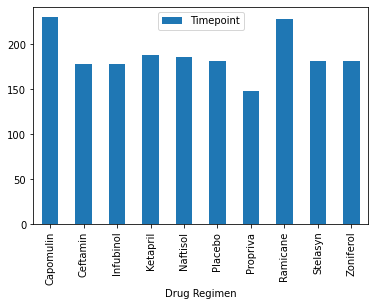

In [96]:
timepoint_df.plot.bar()

In [97]:
drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
num_timpoints = [230,178,178,188,186,181,148,228,181,182]

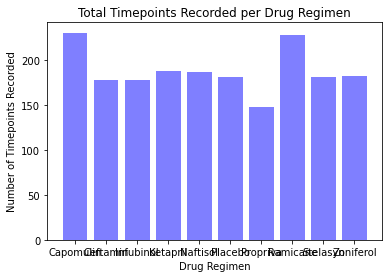

In [104]:
plt.bar(drug_regimen, num_timpoints, color="blue", alpha=0.5, align="center")
plt.title('Total Timepoints Recorded per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints Recorded')
plt.show()

In [108]:
#Determine number of male and female mice taking part in the study
gender_df = merge_df_clean.groupby(['Sex'])
gender_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [121]:
gender_df_unique = gender_df['Mouse ID'].nunique()
gender_df_unique

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

<AxesSubplot:ylabel='Mouse ID'>

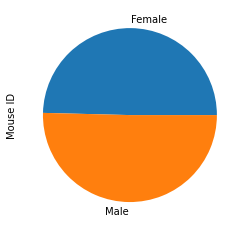

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df_unique.plot.pie()

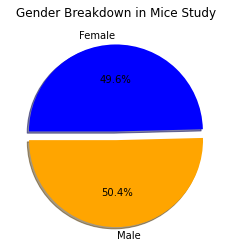

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
total_micestudied = [125, 123]
colors = ["orange", "blue"]
explode = (0.1, 0)

plt.pie(total_micestudied, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Gender Breakdown in Mice Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
